<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Logistic_Regression%2C_Case_Control_Sampling_and_Multiclass_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5000 non-null   int64  
 1   Cholesterol     4901 non-null   float64
 2   BMI             4951 non-null   float64
 3   Blood Pressure  5000 non-null   float64
 4   Condition       5000 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 195.4+ KB
None

Missing Values Summary:
Age                0
Cholesterol       99
BMI               49
Blood Pressure     0
Condition          0
dtype: int64

Descriptive Statistics:
               Age  Cholesterol          BMI  Blood Pressure
count  5000.000000  4901.000000  4951.000000     5000.000000
mean     57.107800   198.639641    29.937570      120.666863
std      63.154863    57.240589     8.735711       35.286059
min      18.000000   100.045408    15.004732       -1.000000
25%      36

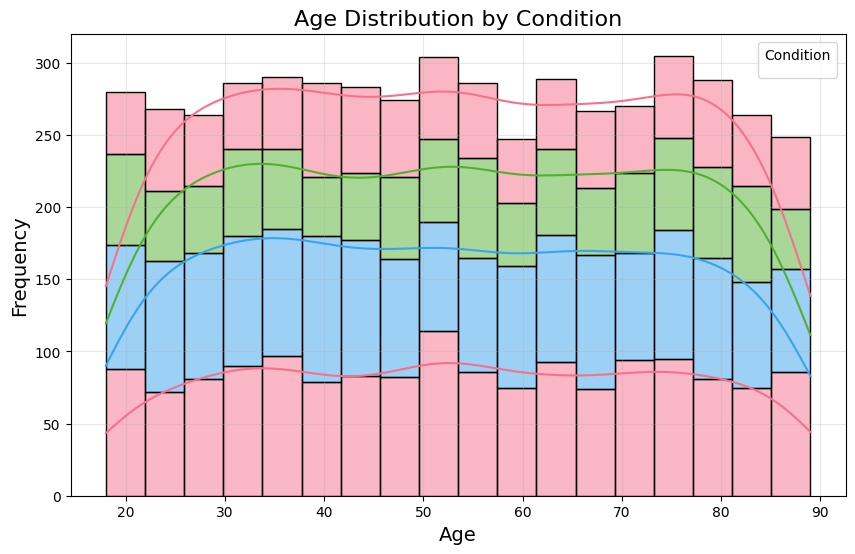

In [ ]:
# Importing the essential libraries to manage data, perform statistical analysis, and visualize insights
# I chose these libraries because they offer robust tools for handling large datasets, implementing machine learning models, and creating elegant visualizations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler

# Setting a seed for reproducibility
# Ensuring that my results are consistent each time I run this code is crucial for both debugging and validation.
np.random.seed(42)

# Simulating a large, messy dataset for binary classification with additional multiclass labels
# This dataset will mimic a healthcare scenario, where I predict medical conditions based on demographic and clinical factors.
n_samples = 5000
age = np.random.randint(18, 90, size=n_samples)
cholesterol = np.random.uniform(100, 300, size=n_samples)
bmi = np.random.uniform(15, 45, size=n_samples)
blood_pressure = np.random.uniform(60, 180, size=n_samples)
condition = np.random.choice(["Heart Disease", "Stroke", "Diabetes", "Healthy"], size=n_samples, p=[0.2, 0.2, 0.3, 0.3])

# Intentionally adding some "dirty" data
# This includes missing values, outliers, and inconsistencies to reflect real-world challenges in data cleaning.
cholesterol[np.random.randint(0, n_samples, 100)] = np.nan  # Adding missing values to cholesterol
bmi[np.random.randint(0, n_samples, 50)] = np.nan  # Adding missing values to BMI
age[np.random.randint(0, n_samples, 20)] = 999  # Introducing outliers in age
blood_pressure[np.random.randint(0, n_samples, 20)] = -1  # Invalid blood pressure values

# Constructing a DataFrame to hold the dataset
data = pd.DataFrame({
    "Age": age,
    "Cholesterol": cholesterol,
    "BMI": bmi,
    "Blood Pressure": blood_pressure,
    "Condition": condition
})

# Performing an initial exploration of the data
# I need to understand the nature of my dataset before proceeding with cleaning and analysis.
print("Initial Dataset Overview:")
print(data.info())
print("\nMissing Values Summary:")
print(data.isnull().sum())
print("\nDescriptive Statistics:")
print(data.describe())

# Cleaning the dataset
# Replacing outliers in age with the median value
data.loc[data["Age"] > 120, "Age"] = data["Age"].median()

# Handling missing values
# I decided to fill missing values in numerical columns with their respective median values to preserve the dataset's distribution.
data["Cholesterol"] = data["Cholesterol"].fillna(data["Cholesterol"].median())
data["BMI"] = data["BMI"].fillna(data["BMI"].median())

# Removing invalid blood pressure values
# For simplicity, I chose to replace negative or zero values with the median of the valid blood pressure values.
data.loc[data["Blood Pressure"] <= 0, "Blood Pressure"] = data["Blood Pressure"].median()

# Encoding the target variable
# I need to convert the "Condition" column into a numeric format suitable for logistic regression.
data["Condition"] = data["Condition"].map({
    "Heart Disease": 0,
    "Stroke": 1,
    "Diabetes": 2,
    "Healthy": 3
})

# Checking the cleaned dataset
print("\nCleaned Dataset Overview:")
print(data.info())
print("\nDescriptive Statistics After Cleaning:")
print(data.describe())

# Visualizing the data to better understand feature distributions and relationships
# I believe that creating visually appealing and informative graphs is an invaluable part of exploratory data analysis.
sns.set_palette("husl")  # Setting a beautiful color palette for the graphs

# Age distribution by condition
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Age", hue="Condition", multiple="stack", palette="husl", kde=True)
plt.title("Age Distribution by Condition", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Condition", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Pairplot to examine relationships between variables
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue="Condition", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Features by Condition", fontsize=16, y=1.02)
plt.show()

# Splitting the data into training and testing sets
# I want to evaluate the performance of my model on unseen data to ensure its robustness.
X = data[["Age", "Cholesterol", "BMI", "Blood Pressure"]]
y = data["Condition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
# Standardizing the features ensures that they are on the same scale, which is essential for models like logistic regression.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementing multinomial logistic regression
# This model generalizes logistic regression to handle multiple outcome categories.
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500)
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)

# Evaluating the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Heart Disease", "Stroke", "Diabetes", "Healthy"], yticklabels=["Heart Disease", "Stroke", "Diabetes", "Healthy"])
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("True Class", fontsize=14)
plt.show()


# Visualizing ROC curves for multiclass classification
# I find these curves helpful in understanding the model's performance for each class.
fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
colors = ["red", "blue", "green", "purple"]
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})", color=color)
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.title("ROC Curves for Multiclass Logistic Regression", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()





















































